In [1]:
from torch.optim import Adam

import render
import regularization
import transformation
from show import show_result_html

IMAGE_SIZE    = 64
DEVICE        = 'cpu'
LEARNING_RATE = 0.05

Loaded InceptionV1 model


100%|██████████| 2560/2560 [01:45<00:00, 24.19it/s, loss=-51.7740]


No domain specified, normalizing from measured (8.06, 13.16)
Converting inexact array by subtracting 8.06
Converting inexact array by scaling by 50.05.
No domain specified, normalizing from measured (7.20, 14.02)
Converting inexact array by subtracting 7.20
Converting inexact array by scaling by 37.36.
No domain specified, normalizing from measured (4.99, 16.00)
Converting inexact array by subtracting 4.99
Converting inexact array by scaling by 23.16.
No domain specified, normalizing from measured (2.00, 20.64)
Converting inexact array by subtracting 2.00
Converting inexact array by scaling by 13.68.
No domain specified, normalizing from measured (-74.07, 94.79)
Converting inexact array by subtracting -74.07
Converting inexact array by scaling by 1.51.
No domain specified, normalizing from measured (-96.48, 116.28)
Converting inexact array by subtracting -96.48
Converting inexact array by scaling by 1.20.



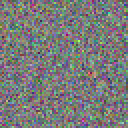
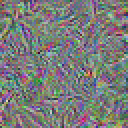
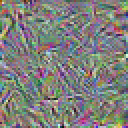
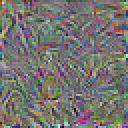
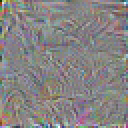
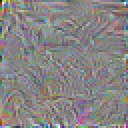

In [2]:
image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer,
                                       image,
                                       device=DEVICE)

show_result_html(images, thresholds)

100%|██████████| 2560/2560 [00:39<00:00, 65.23it/s, loss=-0.3492]


No domain specified, normalizing from measured (7.83, 12.78)
Converting inexact array by subtracting 7.83
Converting inexact array by scaling by 51.52.
No domain specified, normalizing from measured (9.20, 11.40)
Converting inexact array by subtracting 9.20
Converting inexact array by scaling by 116.20.
No domain specified, normalizing from measured (9.51, 11.11)
Converting inexact array by subtracting 9.51
Converting inexact array by scaling by 158.71.
No domain specified, normalizing from measured (9.24, 11.11)
Converting inexact array by subtracting 9.24
Converting inexact array by scaling by 136.81.
No domain specified, normalizing from measured (8.19, 10.80)
Converting inexact array by subtracting 8.19
Converting inexact array by scaling by 98.01.
No domain specified, normalizing from measured (7.99, 10.72)
Converting inexact array by subtracting 7.99
Converting inexact array by scaling by 93.63.



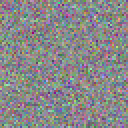
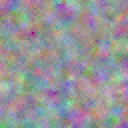
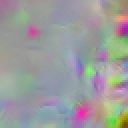
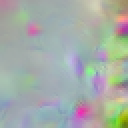
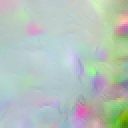
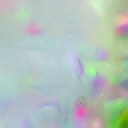

In [4]:
L1_weight   = 0.05
TV_weight   = 0.25
Blur_weight = 0.05

image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

regularizers = [
    regularization.add_regularizer(L1_weight, regularization.l1_reg),
    regularization.add_regularizer(TV_weight, regularization.total_variation),
    regularization.add_regularizer(Blur_weight, regularization.blur_reg),
]

images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer,
                                       image,
                                       regularizers,
                                       device=DEVICE)
show_result_html(images, thresholds)

100%|██████████| 2560/2560 [00:37<00:00, 68.69it/s, loss=-52.8186]


No domain specified, normalizing from measured (7.98, 13.07)
Converting inexact array by subtracting 7.98
Converting inexact array by scaling by 50.08.
No domain specified, normalizing from measured (7.33, 13.48)
Converting inexact array by subtracting 7.33
Converting inexact array by scaling by 41.44.
No domain specified, normalizing from measured (4.10, 16.51)
Converting inexact array by subtracting 4.10
Converting inexact array by scaling by 20.55.
No domain specified, normalizing from measured (0.90, 22.35)
Converting inexact array by subtracting 0.90
Converting inexact array by scaling by 11.89.
No domain specified, normalizing from measured (-74.19, 102.93)
Converting inexact array by subtracting -74.19
Converting inexact array by scaling by 1.44.
No domain specified, normalizing from measured (-97.27, 125.77)
Converting inexact array by subtracting -97.27
Converting inexact array by scaling by 1.14.



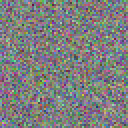
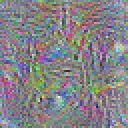
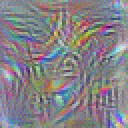
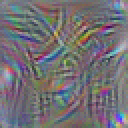
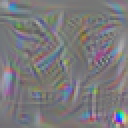
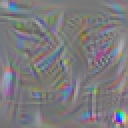

In [3]:
L1_weight   = 0.05
TV_weight   = 0.2
Blur_weight = 0.01

JITTER = 1
ROTATE = 5
SCALE  = 1.1

image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

# regularizers = [
#     regularization.add_regularizer(L1_weight, regularization.l1_reg),
#     regularization.add_regularizer(TV_weight, regularization.total_variation),
#     regularization.add_regularizer(Blur_weight, regularization.blur_reg),
# ]

transformations = transformation.TransformationRobustness(
    [
        transformation.pad_image(),
        transformation.jitter(JITTER*2),
        transformation.random_scale([SCALE ** (n/10.) for n in range(-10, 11)]),
        transformation.random_rotate(range(-ROTATE, ROTATE+1)),
        transformation.jitter(JITTER),
        transformation.crop_padding()
    ]
).to(DEVICE)

# obtain ready-to-display feature visualizations
images, thresholds = render.render_vis("inception4b:branch4:10",
                                       optimizer, 
                                       image,
                                       # regularizers=regularizers,
                                       transformations=transformations,
                                       device=DEVICE)
show_result_html(images, thresholds)